In [46]:
import math 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.pyplot import figure
import Find_bands

In [47]:
#INPUT DATA
n_print = 8
numevelec = 30 
g_effective_theor = -49.234856968       #for InSb
k_min = -3e8
k_max = 4e8
k_step = 2e6
#zero_index = np.abs(int(k_min/k_step))
k_plot = np.linspace(k_min, k_max, int((k_max - k_min)/k_step + 1))
zero_index = int(np.where(k_plot == 0)[0])
print(zero_index)
dB = 0.005
loc = '/mnt/HDD1TB/NW/ALL_B_correct/V0.1_B4_CONC5e8_XY/V1_B4_CONC5e8_XYplane0'
B = 4
#Physical constants 
ELCH = 1.602e-19
MU_B = 9.274e-24

150


In [48]:
E = np.zeros((len(k_plot), n_print))
E_sorted = np.zeros((len(k_plot), n_print))
data_energy = pd.read_fwf(loc + '/OUT/ELECstates.dat', names = ['k', 'E', 'FD'], engine = 'python')
fermi_energy = open(loc + '/OUT/fermi_energy.dat', 'r').read()

for i in range(len(k_plot)):  
    for j in range(n_print):       
       E[i,j] = data_energy.E[i*numevelec+j]

pairs = Find_bands.find_pairs(E,n_print,B, g_effective_theor, zero_index)
numerated = Find_bands.numerate_bands(pairs)
numerated_k = Find_bands.crossing(E, zero_index, numerated, k_step, 4, n_print)
#for i in range(len(k_plot)):

for i in range(len(k_plot)):
    for j in range(n_print-1,-1,-1):    #one has to iterate in different direction to deal with zeros at the end of numerated_k - unpaired bands
        E_sorted[i,int(numerated_k[i,j])] = data_energy.E[i*numevelec+j]

print(np.where(numerated_k[zero_index,:] == 0)[0])
print(pairs)
print(numerated)
print(numerated_k[zero_index + 50])

[0 5 7]
[2, 3, 0, 1, 6, 4, 4, 5]
[0. 2. 1. 3. 4. 0. 5. 0.]
[0. 1. 2. 3. 4. 5. 0. 0.]


(array([0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22, 0.23]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

<Figure size 432x288 with 0 Axes>

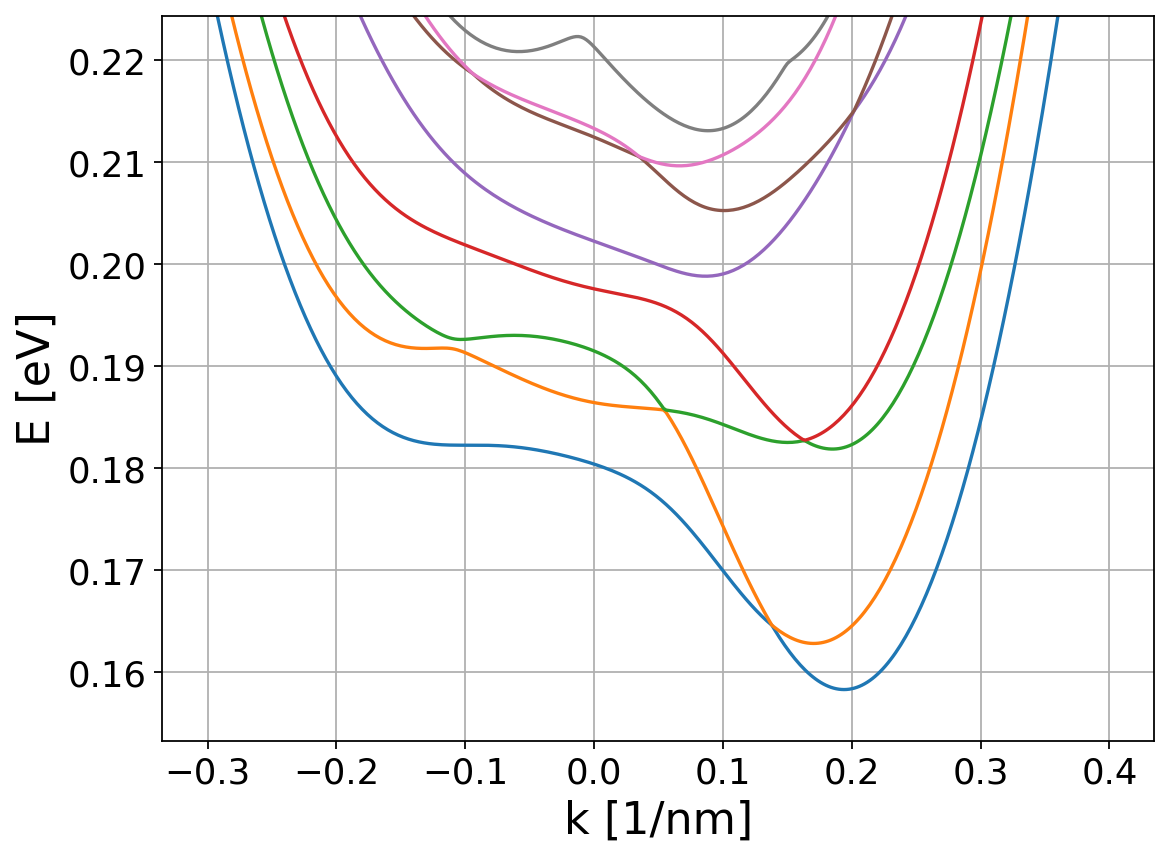

In [49]:
fig = plt.figure()
figure(figsize=(8,6), dpi = 160)
plt.ylabel('E [eV]', fontsize = 20)
plt.xlabel('k [1/nm]', fontsize = 20)
#plt.title(r'$V_{bottom}=0.2V, B = 4T,  \varphi = 0, \theta = \pi/2 $')
#plt.title(r'$V_{bottom}=0.2V, B=0T$')
plt.ylim(np.amin(E) - 0.005, float(fermi_energy)+0.03)
plt.plot(k_plot/1e9, E, markersize = 1)
plt.grid(1)
plt.xticks(fontsize=16, rotation=0)
plt.yticks(fontsize=16, rotation=0)

(array([0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22, 0.23]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

<Figure size 432x288 with 0 Axes>

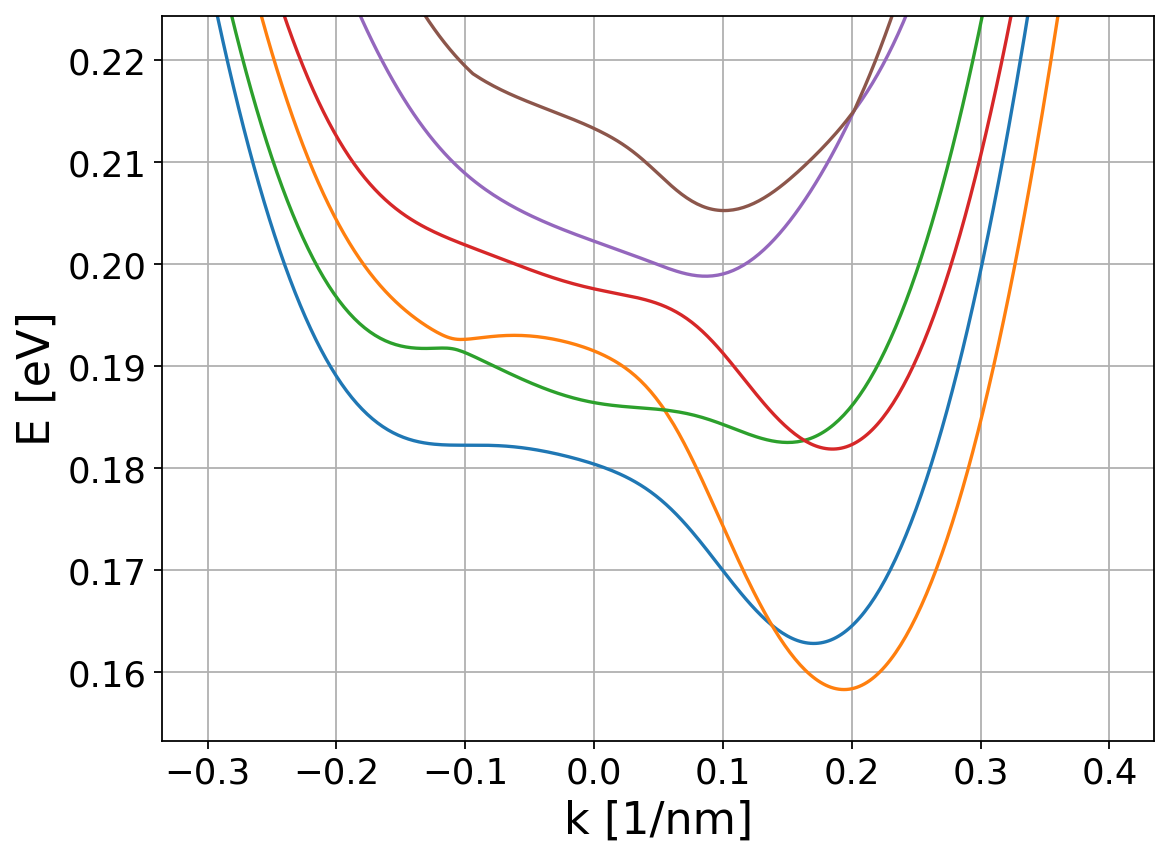

In [50]:
fig = plt.figure()
figure(figsize=(8,6), dpi = 160)
plt.ylabel('E [eV]', fontsize = 20)
plt.xlabel('k [1/nm]', fontsize = 20)
#plt.title(r'$V_{bottom}=0.2V, B = 4T,  \varphi = 0, \theta = \pi/2 $')
#plt.title(r'$V_{bottom}=0.2V, B=0T$')
plt.ylim(np.amin(E) - 0.005, float(fermi_energy)+0.03)
plt.plot(k_plot/1e9, E_sorted, markersize = 1)
plt.grid(1)
plt.xticks(fontsize=16, rotation=0)
plt.yticks(fontsize=16, rotation=0)